In [22]:
import yaml
import pandas as pd
import numpy as np
#from jupyterthemes import jtplot
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('default')
import sys
import os
sys.path.append('/Users/Oliver/Git/pytreadmouse/fun')
import ptm_behaviour
import ptm_base
from tqdm import tqdm
import glob

#jtplot.style(theme='onedork', context='notebook', ticks=True, grid=False, fscale=1.5)
mpl.rcParams['figure.dpi']= 150
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
#jtplot.reset()


In [3]:
dt = pd.DataFrame(data={'behaviour_dir': glob.glob('/Users/Oliver/Google Drive/Imaging_Results/*/behaviour.h5')})
dt['ExpId'] = [int(dt.behaviour_dir.loc[i].split('/')[5].split('_')[0]) for i in range(len(dt))]
dt.ExpId.loc[dt.ExpId==96] = 97
dt = dt.sort_values('ExpId').set_index('ExpId')
dt['Mouse'] = np.nan
dt['Weight'] = np.nan
dt['Cam_FPS'] = np.nan
for expid in dt.index.tolist():
    params = ptm_base.readyaml('OB', expid, resultsdir='/Users/Oliver/Google Drive/Imaging_Results')
    dt.Mouse.loc[expid] = str(int(params['xlsmeta']['Mouse']))
    dt.Weight.loc[expid] = params['xlsmeta']['Weight'] if 'Weight' in params['xlsmeta'] else np.nan
    dt.Cam_FPS.loc[expid] = params['cameras']['BodyCam_FPS'] if 'BodyCam_FPS' in params['cameras'] else np.nan
dt

/Users/Oliver/anaconda3/envs/hippnac/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Opening experiment YAML for OB 88
Opening experiment YAML for OB 93
Opening experiment YAML for OB 95
Opening experiment YAML for OB 97
Opening experiment YAML for OB 98
Opening experiment YAML for OB 100
Opening experiment YAML for OB 101
Opening experiment YAML for OB 103
Opening experiment YAML for OB 107
Opening experiment YAML for OB 108
Opening experiment YAML for OB 109
Opening experiment YAML for OB 111
Opening experiment YAML for OB 113
Opening experiment YAML for OB 115
Opening experiment YAML for OB 116
Opening experiment YAML for OB 117
Opening experiment YAML for OB 118
Opening experiment YAML for OB 123
Opening experiment YAML for OB 127
Opening experiment YAML for OB 129
Opening experiment YAML for OB 130
Opening experiment YAML for OB 132
Opening experiment YAML for OB 134
Opening experiment YAML for OB 136
Opening experiment YAML for OB 139
Opening experiment YAML for OB 149
Opening experiment YAML for OB 152
Opening experiment YAML for OB 154
Opening experiment YAML f

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Oliver/Google Drive/Imaging_Results/yamls/197.yaml'

In [14]:
behaviour_list = []
for idx, row in tqdm(dt.iloc[:40].iterrows()):
    try:
        behaviour_trial = pd.read_hdf(row.behaviour_dir, key='behaviour')
        behaviour_trial['ExpId'] = idx
        behaviour_trial['Mouse'] = row.Mouse
        behaviour_trial['Cam_FPS'] = row.Cam_FPS
        if row.Cam_FPS == 75:
            behaviour_trial.Velocity = behaviour_trial.Velocity.shift(-10)
        behaviour_list.append(behaviour_trial)
    except:
        print(f'Skipping index {idx}')
behaviour = pd.concat(behaviour_list).reset_index()
behaviour.Velocity.loc[~behaviour.Velocity.between(-10,100)] = np.nan

40it [00:15,  2.62it/s]
/Users/Oliver/anaconda3/envs/hippnac/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
behaviour.columns

Index(['index', 'Time', 'Lap', 'Position', 'Velocity', 'Licking', 'Opto',
       'PupilDiam', 'EyeLidDist', 'MotionEnergy_Nose',
       'MotionEnergy_Whiskerpad', 'MotionEnergy_Mouth', 'MotionEnergy_Cheek',
       'PointMotion_FrontPaw', 'PointMotion_Mouth', 'Angle_Tail_3',
       'Angle_Tail', 'Angle_Paws_Front_3', 'Angle_Paws_Front',
       'Angle_Paws_Back', 'Angle_Paws_Back_3', 'Height_Bum', 'ExpId', 'Mouse',
       'Cam_FPS', 'Pump', 'index_facecam', 'index_bodycam', 'Tailroot_Level',
       'NIframes', 'Velocity_ds'],
      dtype='object')

/Users/Oliver/anaconda3/envs/hippnac/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/Oliver/anaconda3/envs/hippnac/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
No handles with labels found to put in legend.


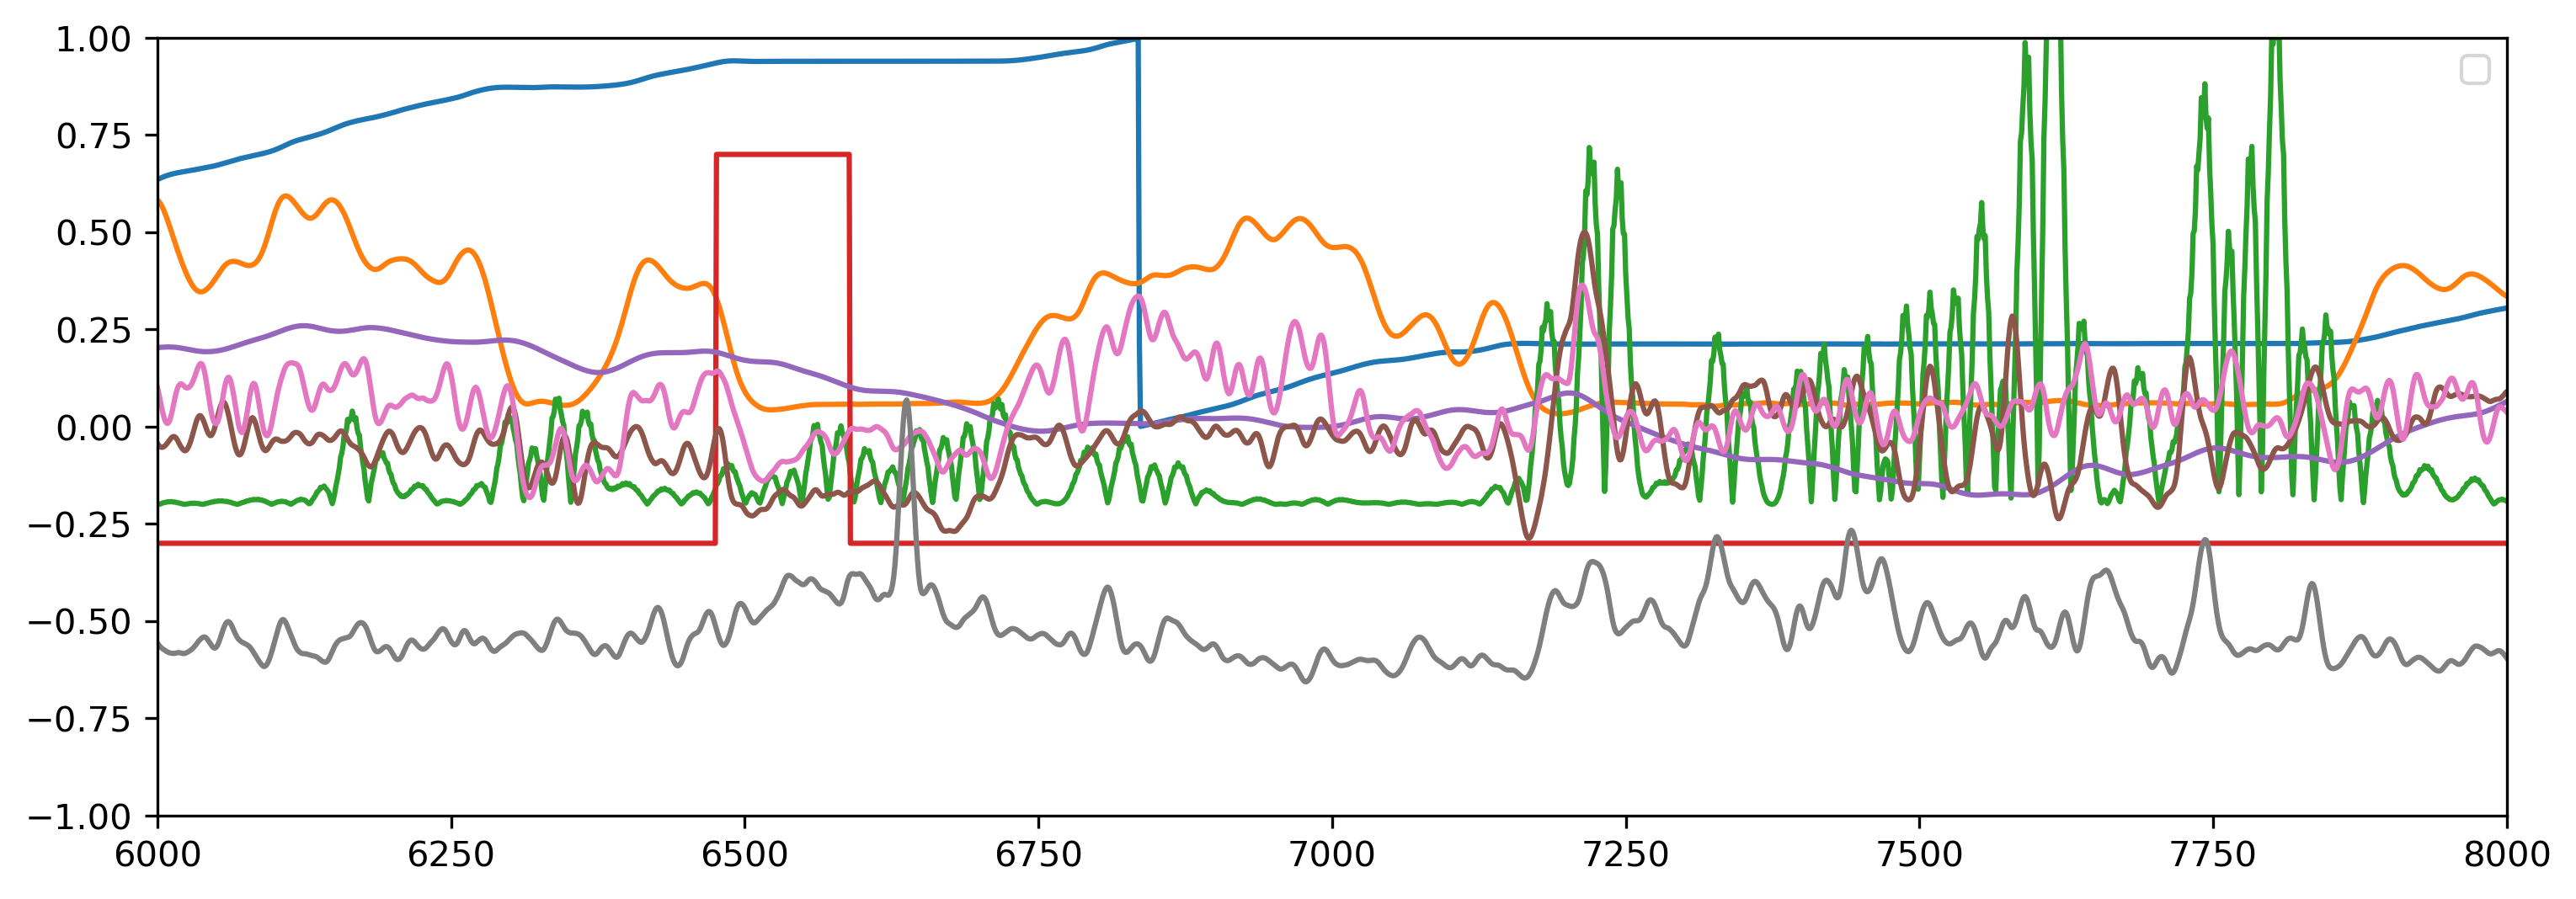

In [32]:
# example trace

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sampledat = behaviour.loc[behaviour.ExpId==171]
sampledat = pd.DataFrame(MinMaxScaler().fit_transform(sampledat), columns=sampledat.columns)
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(sampledat['Position'])
ax.plot(sampledat['Velocity']-.1)
ax.plot(sampledat['Licking']*10-.2)
ax.plot(sampledat['Pump']-.3)
ax.plot(sampledat['PupilDiam']-.4)
ax.plot(sampledat['MotionEnergy_Whiskerpad']-.5)
ax.plot(sampledat['MotionEnergy_Cheek']-.6)
ax.plot(sampledat['PointMotion_Mouth']-.7)
ax.set_xlim(6000,8000);
ax.set_ylim(-1, 1)
ax.legend();

In [67]:
# compare stationary / running behaviour
behaviour['RestRun'] = behaviour.Velocity>2
behaviour['LickBool'] = behaviour.Licking>behaviour.Licking.std()

In [36]:
behaviour.columns

Index(['index', 'Time', 'Lap', 'Position', 'Velocity', 'Licking', 'Opto',
       'PupilDiam', 'EyeLidDist', 'MotionEnergy_Nose',
       'MotionEnergy_Whiskerpad', 'MotionEnergy_Mouth', 'MotionEnergy_Cheek',
       'PointMotion_FrontPaw', 'PointMotion_Mouth', 'Angle_Tail_3',
       'Angle_Tail', 'Angle_Paws_Front_3', 'Angle_Paws_Front',
       'Angle_Paws_Back', 'Angle_Paws_Back_3', 'Height_Bum', 'ExpId', 'Mouse',
       'Cam_FPS', 'Pump', 'index_facecam', 'index_bodycam', 'Tailroot_Level',
       'NIframes', 'Velocity_ds', 'RestRun'],
      dtype='object')

In [65]:
import pingouin as pg
behaviour_mov = behaviour.groupby(['RestRun', 'ExpId']).mean()

pg.pairwise_ttests(data=pd.melt(behaviour_mov, ignore_index=False,
                            var_name='feature', value_name='z', 
                                value_vars=['Licking', 'PupilDiam', 'PointMotion_FrontPaw', 
                                                                          'MotionEnergy_Nose', 'MotionEnergy_Whiskerpad', 'MotionEnergy_Mouth', 
                                                                         'PointMotion_Mouth', 'Height_Bum']).reset_index(), dv='z', within='feature',
                  between='RestRun', subject='ExpId', padjust='bonf').iloc[-8:]

,Contrast,feature,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
29,feature * RestRun,Height_Bum,False,True,False,True,-11.774195,68.0,two-sided,4.532857e-18,3.626286e-17,bonf,7.431e+14,-2.783413
30,feature * RestRun,Licking,False,True,False,True,1.890383,78.0,two-sided,6.242098e-02,4.993679e-01,bonf,1.08,0.418625
31,feature * RestRun,MotionEnergy_Mouth,False,True,False,True,-4.695023,76.0,two-sided,1.158109e-05,9.264869e-05,bonf,1504.173,-1.052687
32,feature * RestRun,MotionEnergy_Nose,False,True,False,True,-7.788985,76.0,two-sided,2.787907e-11,2.230326e-10,bonf,2.398e+08,-1.746394
33,feature * RestRun,MotionEnergy_Whiskerpad,False,True,False,True,-8.459109,76.0,two-sided,1.452200e-12,1.161760e-11,bonf,3.96e+09,-1.896644
34,feature * RestRun,PointMotion_FrontPaw,False,True,False,True,-12.259004,76.0,two-sided,1.097320e-19,8.778559e-19,bonf,2.802e+16,-2.748631
35,feature * RestRun,PointMotion_Mouth,False,True,False,True,1.705062,76.0,two-sided,9.226750e-02,7.381400e-01,bonf,0.819,0.382298
36,feature * RestRun,PupilDiam,False,True,False,True,-8.948402,76.0,two-sided,1.675922e-13,1.340738e-12,bonf,3.104e+10,-2.006350


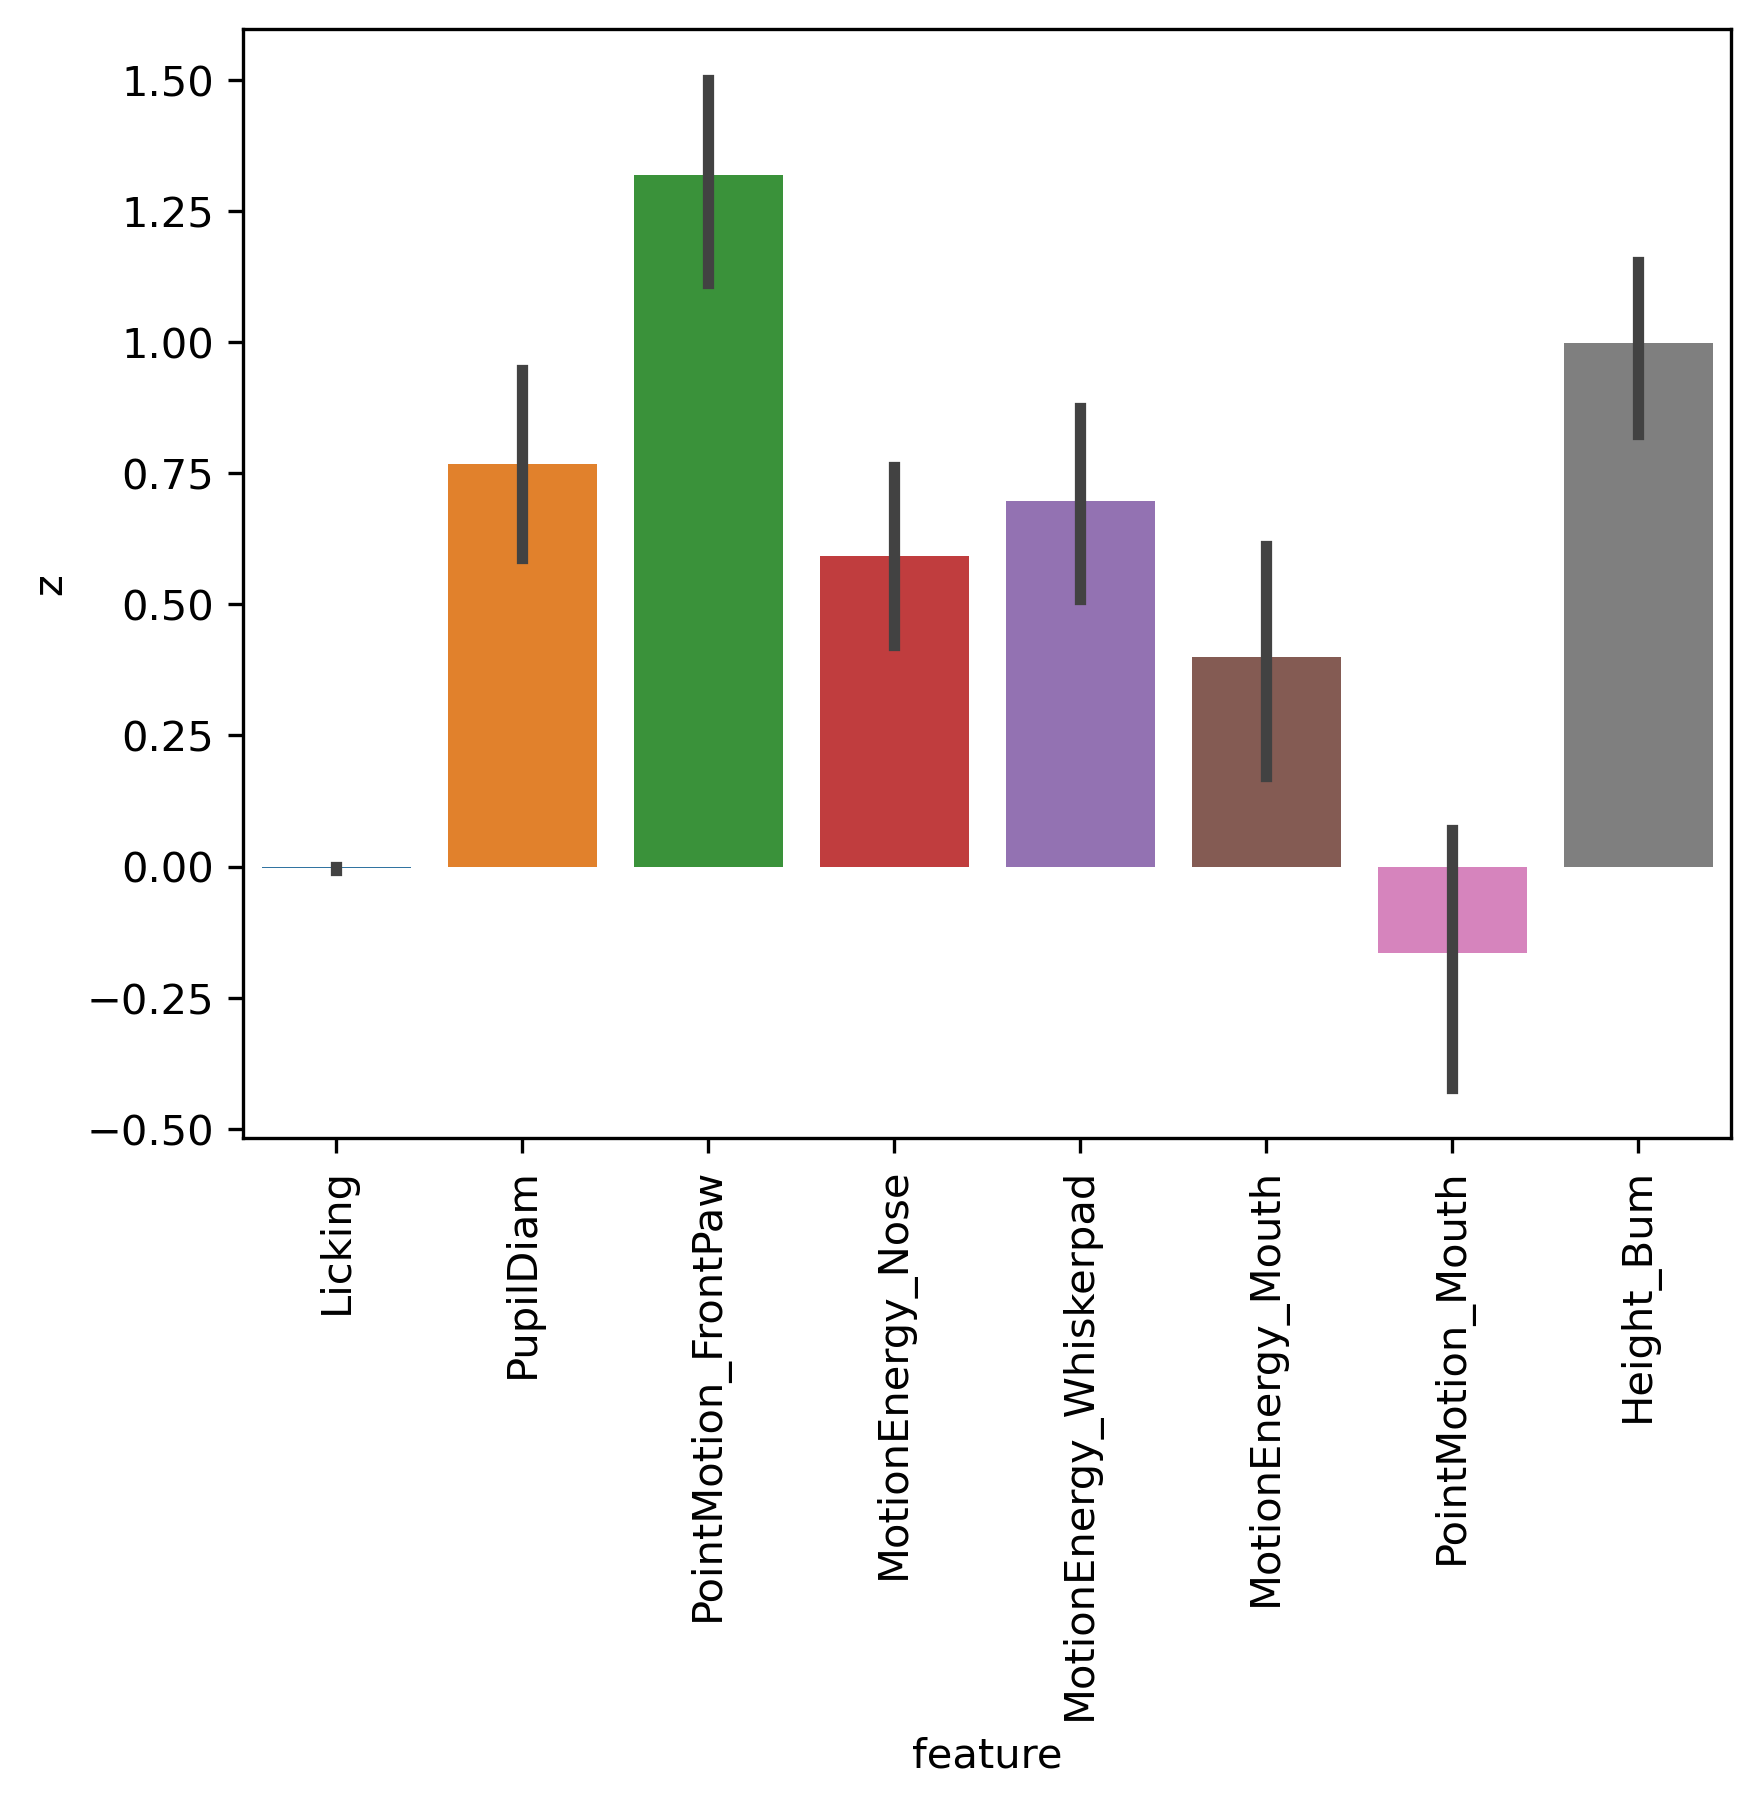

In [58]:
behaviour_movdiff = pd.melt((behaviour_mov.loc[1] - behaviour_mov.loc[0]), ignore_index=False, 
                            var_name='feature', value_name='z', value_vars=['Licking', 'PupilDiam', 'PointMotion_FrontPaw', 
                                                                          'MotionEnergy_Nose', 'MotionEnergy_Whiskerpad', 'MotionEnergy_Mouth', 
                                                                         'PointMotion_Mouth', 'Height_Bum'])
sns.barplot(data=behaviour_movdiff, y='z', x='feature', ci=68)
plt.xticks(rotation=90);
plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/moving_values.pdf', dpi=300)


In [77]:
import pingouin as pg
behaviour_lick = behaviour.groupby(['LickBool', 'ExpId']).mean()

pg.pairwise_ttests(data=pd.melt(behaviour_lick, ignore_index=False,
                            var_name='feature', value_name='z', 
                                value_vars=['Velocity', 'Licking', 'PupilDiam', 'PointMotion_FrontPaw', 
                                                                          'MotionEnergy_Nose', 'MotionEnergy_Whiskerpad', 'MotionEnergy_Mouth', 
                                                                         'PointMotion_Mouth', 'Height_Bum']).reset_index(), dv='z', within='feature',
                  between='LickBool', subject='ExpId', padjust='bonf').iloc[-8:]

,Contrast,feature,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
38,feature * LickBool,Licking,False,True,False,True,-14.507846,37.190994,two-sided,6.839875e-17,6.155887e-16,bonf,9.76e+19,-3.467624
39,feature * LickBool,MotionEnergy_Mouth,False,True,False,True,-4.270197,35.660092,two-sided,1.379704e-04,1.241734e-03,bonf,359.146,-1.016404
40,feature * LickBool,MotionEnergy_Nose,False,True,False,True,-2.596757,35.226398,two-sided,1.363975e-02,1.227577e-01,bonf,4.09,-0.618420
41,feature * LickBool,MotionEnergy_Whiskerpad,False,True,False,True,-3.408130,35.299856,two-sided,1.649506e-03,1.484555e-02,bonf,28.843,-0.811575
42,feature * LickBool,PointMotion_FrontPaw,False,True,False,True,2.809081,37.103010,two-sided,7.880814e-03,7.092733e-02,bonf,6.529,0.667463
43,feature * LickBool,PointMotion_Mouth,False,True,False,True,-6.120767,35.966551,two-sided,4.811874e-07,4.330687e-06,bonf,2.495e+05,-1.456335
44,feature * LickBool,PupilDiam,False,True,False,True,0.081556,35.223517,two-sided,9.354612e-01,1.000000e+00,bonf,0.24,0.019423
45,feature * LickBool,Velocity,False,True,False,True,3.140024,46.621253,two-sided,2.930383e-03,2.637344e-02,bonf,14.439,0.682896


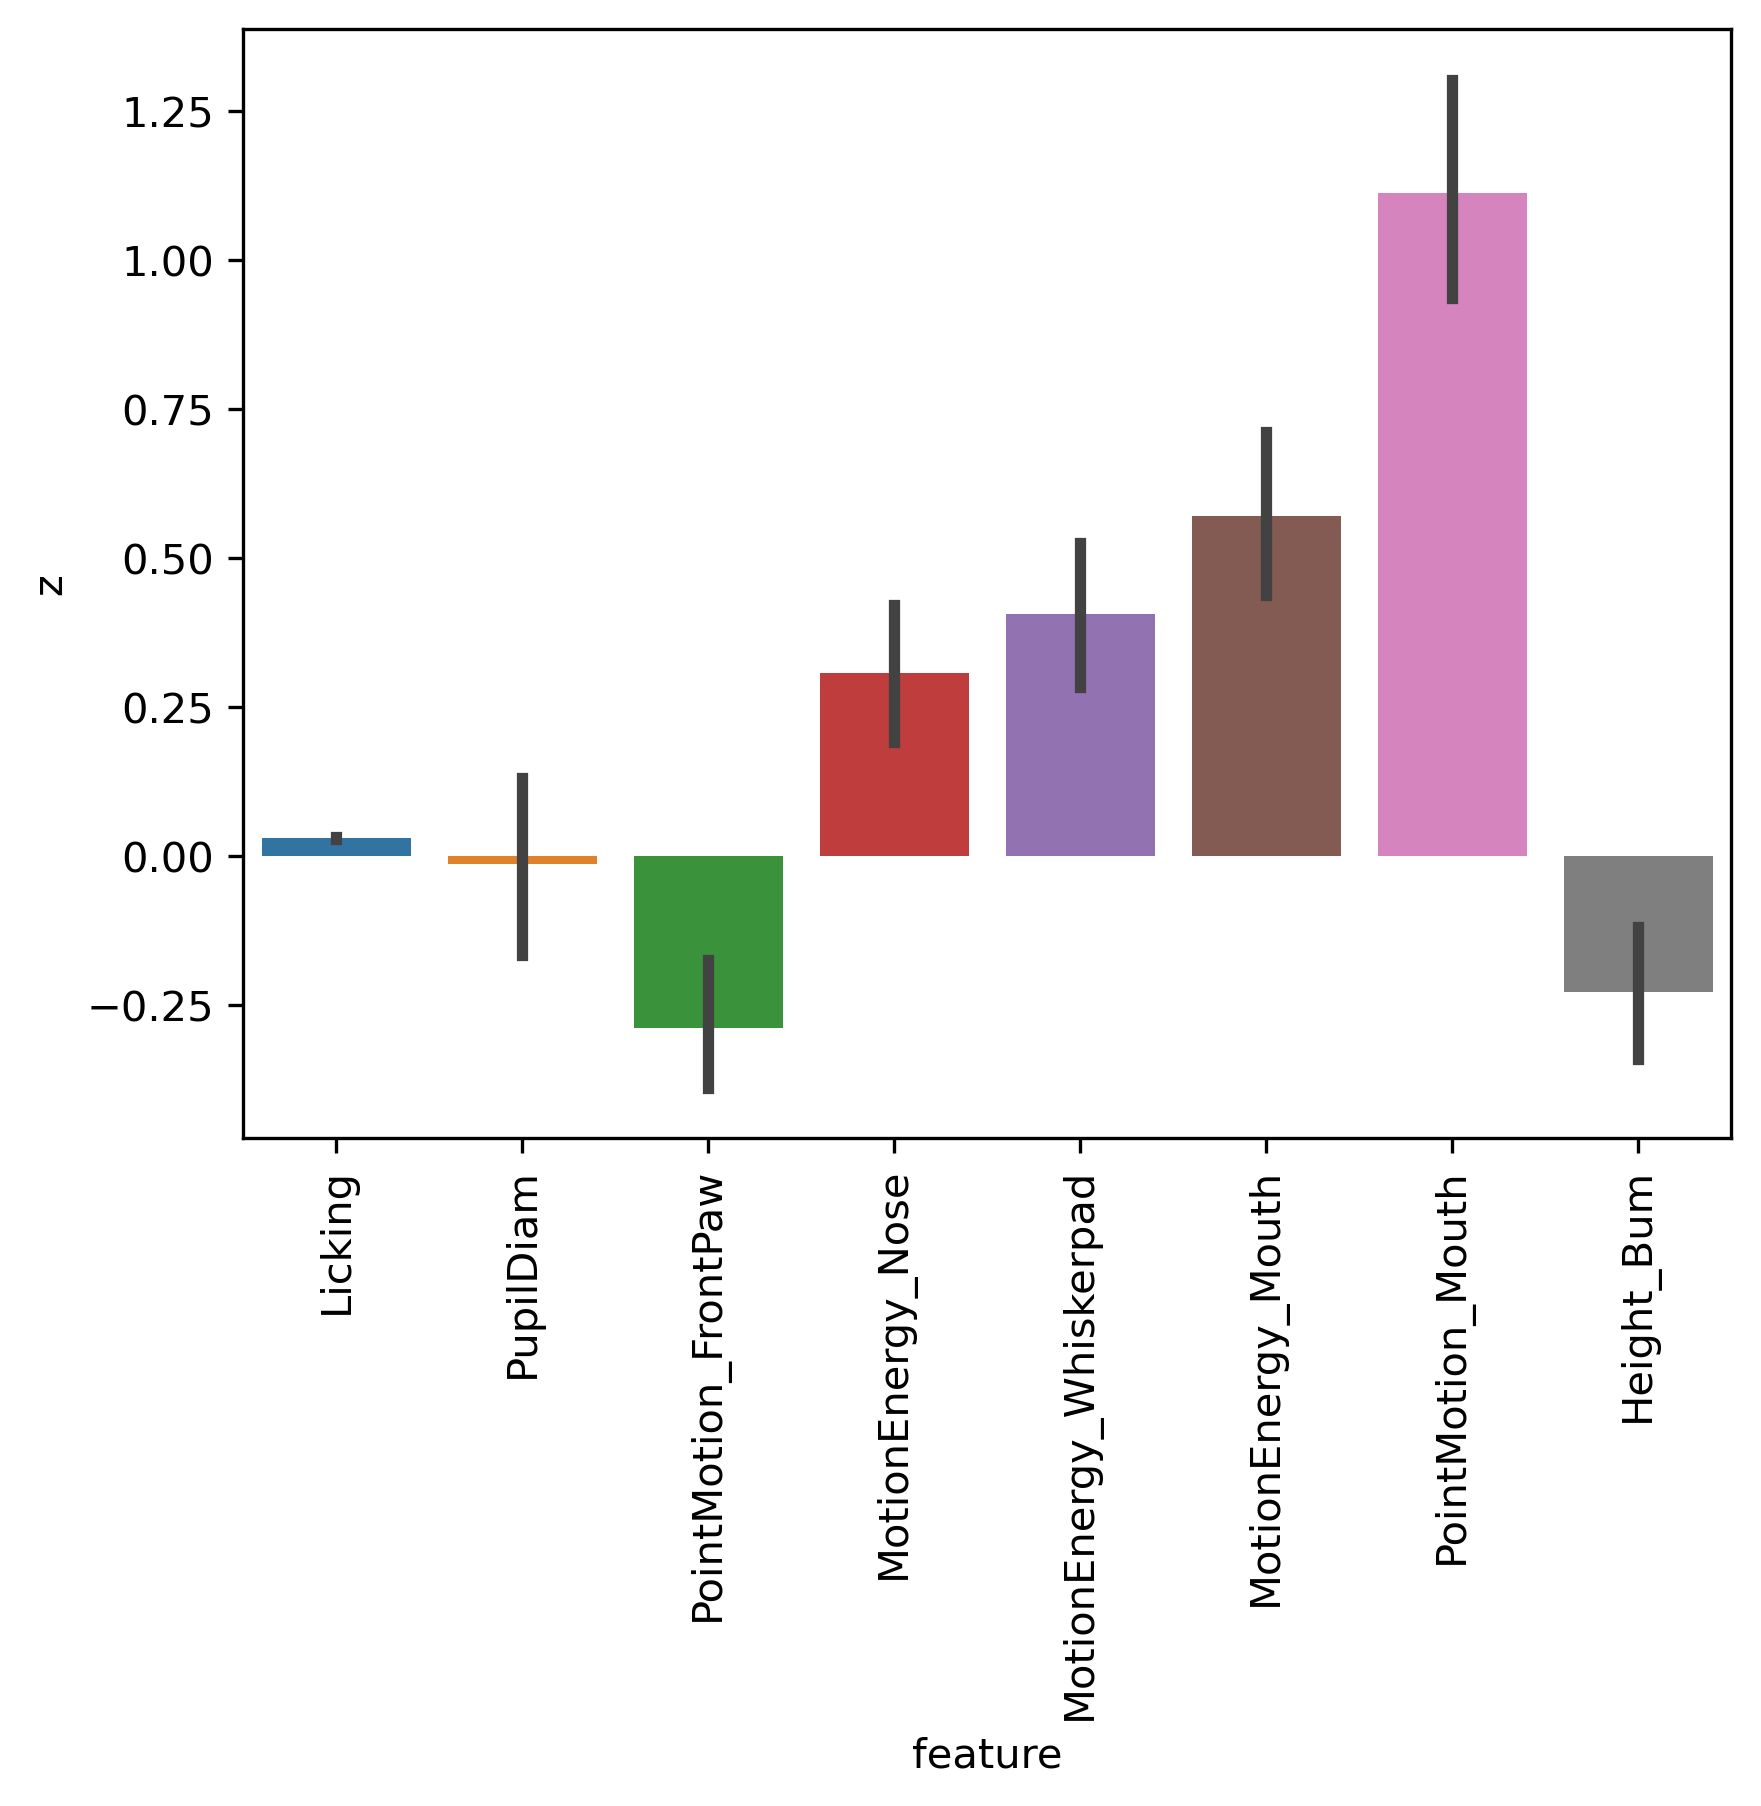

In [74]:
behaviour_lickdiff = pd.melt((behaviour_lick.loc[1] - behaviour_lick.loc[0]), ignore_index=False, 
                            var_name='feature', value_name='z', value_vars=['Licking', 'PupilDiam', 'PointMotion_FrontPaw', 
                                                                          'MotionEnergy_Nose', 'MotionEnergy_Whiskerpad', 'MotionEnergy_Mouth', 
                                                                         'PointMotion_Mouth', 'Height_Bum'])
sns.barplot(data=behaviour_lickdiff, y='z', x='feature', ci=68)
plt.xticks(rotation=90);
plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/licking_values.pdf', dpi=300)


# Pupil ~ Velocity

In [16]:
behaviour.columns

Index(['index', 'Time', 'Lap', 'Position', 'Velocity', 'Licking', 'Opto',
       'PupilDiam', 'EyeLidDist', 'MotionEnergy_Nose',
       'MotionEnergy_Whiskerpad', 'MotionEnergy_Mouth', 'MotionEnergy_Cheek',
       'PointMotion_FrontPaw', 'PointMotion_Mouth', 'Angle_Tail_3',
       'Angle_Tail', 'Angle_Paws_Front_3', 'Angle_Paws_Front',
       'Angle_Paws_Back', 'Angle_Paws_Back_3', 'Height_Bum', 'ExpId', 'Mouse',
       'Cam_FPS', 'Pump', 'index_facecam', 'index_bodycam', 'Tailroot_Level',
       'NIframes', 'Velocity_ds'],
      dtype='object')

In [179]:
# behaviour['Time_100ms'] = round(behaviour.Time*10)
behaviour_test = behaviour.loc[behaviour.ExpId==171].reset_index().iloc[:-30]#.groupby('Time_100ms').mean().reset_index()[:-3]
behaviour_test

,level_0,index,Time,Lap,Position,Velocity,Licking,Opto,PupilDiam,EyeLidDist,...,ExpId,Mouse,Cam_FPS,Pump,index_facecam,index_bodycam,Tailroot_Level,NIframes,Velocity_ds,Time_100ms
0,5871156,0,0.007,1,341.113973,2.320658,0.000000,NaN,0.036119,-0.291509,...,171,211,75.0,False,0.0,0.0,NaN,NaN,NaN,0.0
1,5871157,1,0.020,1,341.275614,2.318146,0.000000,NaN,0.036183,-0.291219,...,171,211,75.0,False,1.0,1.0,NaN,NaN,NaN,0.0
2,5871158,2,0.034,1,341.441255,2.318729,0.000000,NaN,0.036380,-0.290378,...,171,211,75.0,False,2.0,2.0,NaN,NaN,NaN,0.0
3,5871159,3,0.047,1,341.614394,2.322509,0.000000,NaN,0.036725,-0.289012,...,171,211,75.0,False,3.0,3.0,NaN,NaN,NaN,0.0
4,5871160,4,0.060,1,341.788867,2.330840,0.000000,NaN,0.037233,-0.287115,...,171,211,75.0,False,4.0,4.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222903,6094059,222903,2964.595,119,87.376580,0.000792,0.000209,NaN,1.085544,-0.086331,...,171,211,75.0,False,222903.0,222903.0,NaN,NaN,NaN,29646.0
222904,6094060,222904,2964.608,119,87.376580,0.000738,0.000226,NaN,1.071844,-0.097431,...,171,211,75.0,False,222904.0,222904.0,NaN,NaN,NaN,29646.0
222905,6094061,222905,2964.622,119,87.376580,0.000684,0.000210,NaN,1.058074,-0.108435,...,171,211,75.0,False,222905.0,222905.0,NaN,NaN,NaN,29646.0
222906,6094062,222906,2964.635,119,87.376580,0.000632,0.000210,NaN,1.044251,-0.119315,...,171,211,75.0,False,222906.0,222906.0,NaN,NaN,NaN,29646.0


(20000.0, 25000.0)

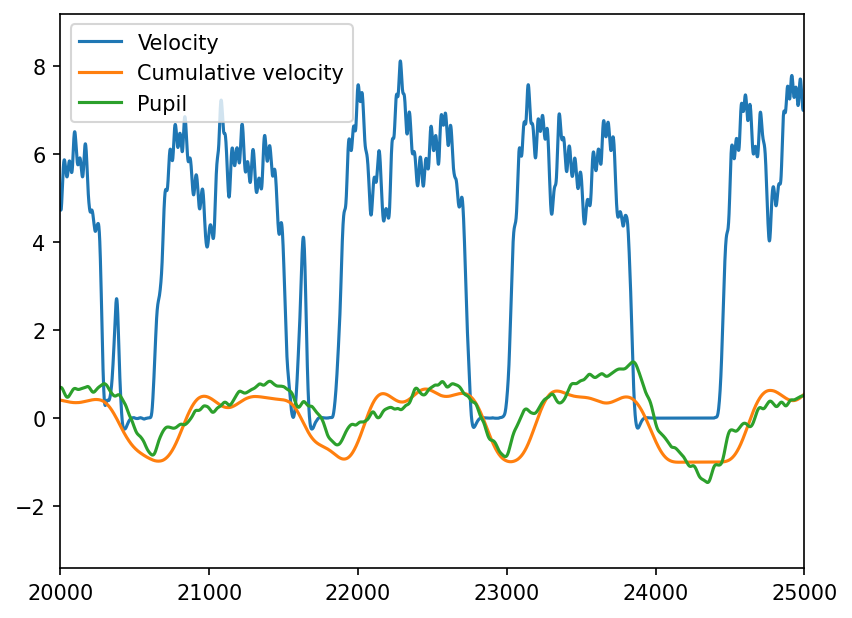

In [326]:
behaviour_test.Velocity.plot()
(behaviour_test.Velocity.rolling(300, win_type='hamming').mean()/4-1).plot(label='Cumulative velocity')
# plt.plot(np.convolve(behaviour_test.Velocity, np.ones(150)/150, 'valid'))
behaviour_test.PupilDiam.plot(label='Pupil')
plt.legend()
plt.xlim(20000, 25000)

In [256]:
pred1.corr(behaviour_test.PupilDiam)

0.5728424362721556

Mean deviation 0.6778111257194175

Correlation 0.5728424362721555



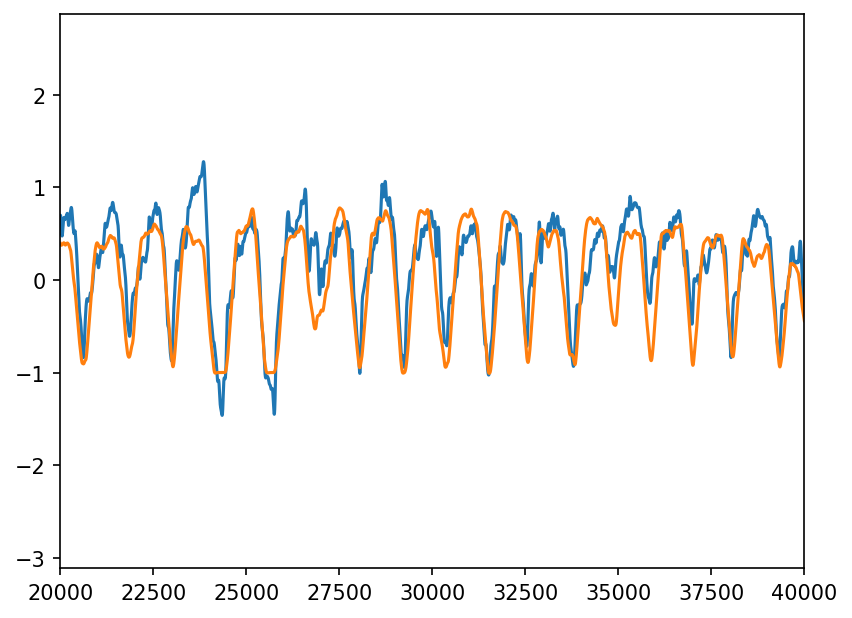

In [325]:
# behaviour_test.Velocity.plot()
behaviour_test.PupilDiam.plot()
pred1 = (behaviour_test.Velocity.rolling(300, win_type='boxcar').mean()/4-1)
# pred2 = (behaviour_test.Velocity.rolling(300, win_type='hamming').mean()/3-1)
pred1.plot()
#plt.plot(np.concatenate([[np.nan]*300, y_pred]))
sub1 = np.mean(np.abs(behaviour_test.PupilDiam - pred1))
corr1 = pred1.corr(behaviour_test.PupilDiam)
#(behaviour_test.PupilDiam-pred1).plot()
# sub2 = np.mean(np.abs(behaviour_test.PupilDiam - pred2))
# corr2 = pred2.corr(behaviour_test.PupilDiam)
plt.xlim(20000, 40000)

print(f'Mean deviation {sub1}\n')
print(f'Correlation {corr1}\n')


In [62]:
from scipy import optimize

def func(x, w, c, o):
    pred = (np.convolve(x, np.ones(w)/w, 'valid')/c+o)
    return np.nanmean(np.abs(pred - behaviour_test.PupilDiam))

res = optimize.minimize(func, args=(behaviour.Velocity, c, o), x0=[150, 3, -1.5], method='Nelder-Mead', options={'maxiter':10000})


ValueError: maximum supported dimension for an ndarray is 32, found 6740397

In [182]:
import statsmodels.api as sm

win = range(-300, 150)
y = behaviour_test.PupilDiam.iloc[-win[0]:-win[-1]].values
X = np.empty((len(y), len(win)))
for i in range(len(y)):
    X[i, :] = behaviour_test.Velocity.iloc[i : i-win[0]+win[-1]+1]
X2 = sm.add_constant(X)  # Adds a constant term to the predictor

est = sm.OLS(y, X2)
est = est.fit()
est.summary()
y_pred = est.predict(X2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     277.9
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:13:59   Log-Likelihood:            -2.6605e+05
No. Observations:              222459   AIC:                         5.330e+05
Df Residuals:                  222008   BIC:                         5.376e+05
Df Model:                         450                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9200      0.003   -289.610      0.000      -0.926      -0.914
x1            10.8230      1.998      5.416      0.000       6.907      14.739
x2           -17.6064      5.617     -3.134      0.002     -28.616      -6.596
x3             7.3423      7.264      1.011      0.312      -6.895      21.580
x4           -11.6643      8.066     -1.446      0.148     -27.473       4.144
x5            14.8090      9.429      1.571      0.116      -3.672      33.290
x6            -4.8414     10.103     -0.479      0.632     -24.642      14.959
x7             7.4460     10.354      0.719      0.472     -12.848      27.740
x8            -9.7492     10.832     -0.900      0.368     -30.980      11.482
x9            10.3423     11.453      0.903      0.367     -12.105      32.790
x10           -9.4029     12.024     -0.782      0.434     -32.969      14.163
x11           -1.0234     12.124     -0.084      0.933     -24.787      22.740
x12            4.0394     12.160      0.332      0.740     -19.795      27.873
x13           -0.2548     12.186     -0.021      0.983     -24.140      23.630
x14            2.9031     12.200      0.238      0.812     -21.008      26.814
x15           -4.2938     12.269     -0.350      0.726     -28.341      19.754
x16           -0.8411     12.285     -0.068      0.945     -24.919      23.237
x17            1.5872     12.294      0.129      0.897     -22.509      25.683
x18            3.0931     12.296      0.252      0.801     -21.007      27.194
x19           -5.2033     12.388     -0.420      0.674     -29.483      19.077
x20            3.1374     12.482      0.251      0.802     -21.326      27.601
x21            1.8323     12.484      0.147      0.883     -22.636      26.300
x22           -3.6917     12.527     -0.295      0.768     -28.243      20.860
x23            1.6233     12.565      0.129      0.897     -23.004      26.251
x24           -2.1785     12.585     -0.173      0.863     -26.844      22.487
x25            2.4814     12.614      0.197      0.844     -22.242      27.205
x26            0.8983     12.618      0.071      0.943     -23.832      25.628
x27           -2.2284     12.631     -0.176      0.860     -26.984      22.528
x28           -0.8543     12.634     -0.068      0.946     -25.616      23.907
x29            2.5308     12.648      0.200      0.841     -22.260      27.321
x30           -0.8631     12.664     -0.068      0.946     -25.685      23.958
x31           -0.8770     12.664     -0.069      0.945     -25.698      23.944
x32            1.5921     12.673      0.126      0.900     -23.248      26.432
x33           -1.2114     12.684     -0.096      0.924     -26.073      23.650
x34            0.8618     12.690      0.068      0.946     -24.011      25.734
x35           -0.7623     12.694     -0.060      0.952     -25.642      24.118
x3

In [196]:
y_sub = y-y_pred

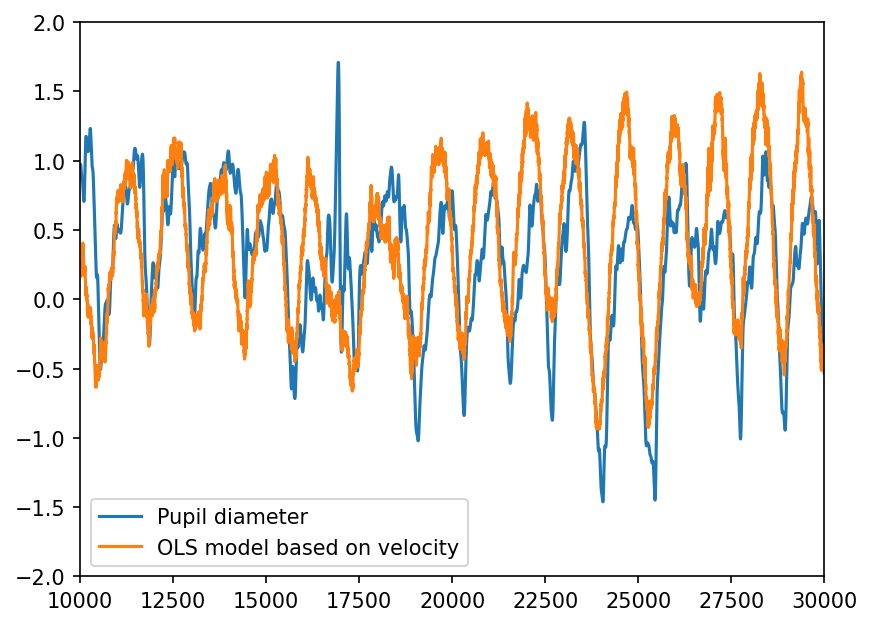

In [322]:
plt.plot(y, label='Pupil diameter')
plt.plot(y_pred, label='OLS model based on velocity')
plt.xlim(10000, 30000)
plt.ylim(-2, 2)
plt.legend()

In [144]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

xcov_monthly = [crosscorr(behaviour_test.PupilDiam, behaviour_test.Velocity, lag=i) for i in range(-500, 500)]

6310.5129861503594115


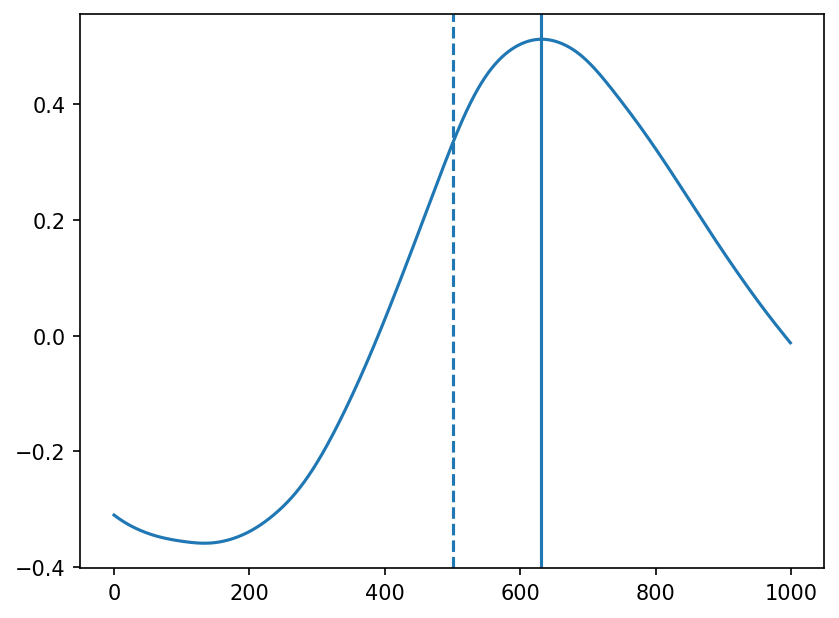

In [150]:
plt.plot(xcov_monthly)
plt.axvline(500, ls='--')
plt.axvline(np.argmax(xcov_monthly))
print(str(np.argmax(xcov_monthly))+str(max(xcov_monthly)))


# Movement onset

In [9]:
running = behaviour.loc[behaviour.Velocity>5][['Velocity', 'Cam_FPS']]
onsets75_coarse = running.loc[(running.Cam_FPS==75)&(running.index.to_series().diff()>375)].index.to_list()
onsets25_coarse = running.loc[(running.Cam_FPS==25)&(running.index.to_series().diff()>125)].index.to_list()
onsets75_precise = []
onsets25_precise = []
for onset in onsets75_coarse:
    velo = behaviour.Velocity.iloc[onset-150:onset]
    if pd.isnull(behaviour[['Velocity', 'PointMotion_FrontPaw', 'PupilDiam']].loc[onset-150:onset+75]).sum().any()==0:
        onsets75_precise += [velo[velo.diff()>.05].index.to_series().min()]
for onset in onsets25_coarse:
    velo = behaviour.Velocity.iloc[onset-50:onset]
    if pd.isnull(behaviour[['Velocity', 'PointMotion_FrontPaw', 'PupilDiam']].loc[onset-50:onset+25]).sum().any()==0:
        onsets25_precise += [velo[velo.diff()>.05].index.to_series().min()]

In [10]:
# cut out onsets one second at beginning/end of trials
exp_breaks = behaviour.loc[(behaviour.ExpId.diff().astype(bool))].index.tolist() + [len(behaviour)]
break_range = np.array([np.arange(i-75, i+75) for i in exp_breaks]).flatten()
onsets75_precise = [o for o in onsets75_precise if o not in break_range]
onsets25_precise = [o for o in onsets25_precise if o not in break_range]

In [11]:
velo_onsets25 = pd.DataFrame([behaviour.Velocity.loc[o-50:o+25].tolist() for o in onsets25_precise]).T
velo_onsets25['Time'] = (velo_onsets25.index-50)/25
onsets25 = velo_onsets25.melt(id_vars='Time', var_name='onset_trial', value_name='Velocity')
onsets25['Motion_Frontpaw'] = pd.DataFrame([behaviour.PointMotion_FrontPaw.loc[o-50:o+25].tolist() for o in onsets25_precise]).values.flatten()
onsets25['MotionEnergy_Nose'] = pd.DataFrame([behaviour.MotionEnergy_Nose.loc[o-50:o+25].tolist() for o in onsets25_precise]).values.flatten()
onsets25['PupilDiameter'] = pd.DataFrame([behaviour.PupilDiam.loc[o-50:o+25].tolist() for o in onsets25_precise]).values.flatten()
onsets25['ExpId'] = pd.DataFrame([behaviour.ExpId.loc[o-50:o+25].tolist() for o in onsets25_precise]).values.flatten()
onsets25['FPS'] = 25
onsets25['post'] = onsets25.Time>0
from scipy.stats import zscore

velo_onsets75 = pd.DataFrame([behaviour.Velocity.loc[o-150:o+225].tolist() for o in onsets75_precise]).T
velo_onsets75['Time'] = (velo_onsets75.index-150)/75
onsets75 = velo_onsets75.melt(id_vars='Time', var_name='onset_trial', value_name='Velocity')
onsets75['Velocity_diff'] = pd.DataFrame([behaviour.Position.loc[o-150:o+225].diff().tolist() for o in onsets75_precise]).values.flatten()
onsets75.Velocity_diff.loc[onsets75.Velocity_diff<-4] = np.nan
onsets75.Velocity_diff.loc[onsets75.Velocity_diff>10] = np.nan
onsets75.Velocity_diff = onsets75.Velocity_diff*10-1.2
#onsets75['Cylinder_Motion_raw'] = pd.DataFrame([behaviour.Cylinder_Motion_raw.loc[o-150:o+75].tolist() for o in onsets75_precise]).values.flatten()
#onsets75['Cylinder_Motion_raw'] = onsets75['Cylinder_Motion_raw'] + 0.2
#onsets75['Motion_Frontpaw_raw'] = pd.DataFrame([behaviour.PointMotion_FrontPaw_raw.loc[o-150:o+75].tolist() for o in onsets75_precise]).values.flatten()
onsets75['Motion_Frontpaw'] = pd.DataFrame([behaviour.PointMotion_FrontPaw.loc[o-150:o+225].tolist() for o in onsets75_precise]).values.flatten()
onsets75['MotionEnergy_Nose'] = pd.DataFrame([behaviour.MotionEnergy_Nose.loc[o-150:o+225].tolist() for o in onsets75_precise]).values.flatten()
onsets75['MotionEnergy_Whiskerpad'] = pd.DataFrame([behaviour.MotionEnergy_Whiskerpad.loc[o-150:o+225].tolist() for o in onsets75_precise]).values.flatten()
onsets75['PupilDiameter'] = pd.DataFrame([behaviour.PupilDiam.loc[o-150:o+225].tolist() for o in onsets75_precise]).values.flatten()
onsets75['ExpId'] = pd.DataFrame([behaviour.ExpId.loc[o-150:o+225].tolist() for o in onsets75_precise]).values.flatten()
onsets75['post'] = onsets75.Time>0
onsets75.onset_trial += onsets25.onset_trial.max()
onsets75['FPS'] = 75

onsets = pd.concat([onsets25, onsets75])


/Users/Oliver/anaconda3/envs/hippnac/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/Oliver/anaconda3/envs/hippnac/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
onsets25

,Time,onset_trial,Velocity,Motion_Frontpaw,MotionEnergy_Nose,PupilDiameter,ExpId,FPS,post
0,-2.00,0,-0.146551,-1.449966,-0.787371,2.727904,88,25,False
1,-1.96,0,-0.122281,-1.452344,-0.786431,2.733165,88,25,False
2,-1.92,0,-0.072152,-1.454722,-0.758493,2.737832,88,25,False
3,-1.88,0,-0.031911,-1.457100,-0.848775,2.741150,88,25,False
4,-1.84,0,-0.001258,-1.459478,-1.094614,2.742441,88,25,False
...,...,...,...,...,...,...,...,...,...
62391,0.84,820,11.868767,0.972217,1.156967,1.127592,118,25,True
62392,0.88,820,11.644804,1.040000,1.294860,1.148778,118,25,True
62393,0.92,820,11.467668,1.084593,1.409406,1.170000,118,25,True
62394,0.96,820,11.286564,1.104077,1.443514,1.191284,118,25,True


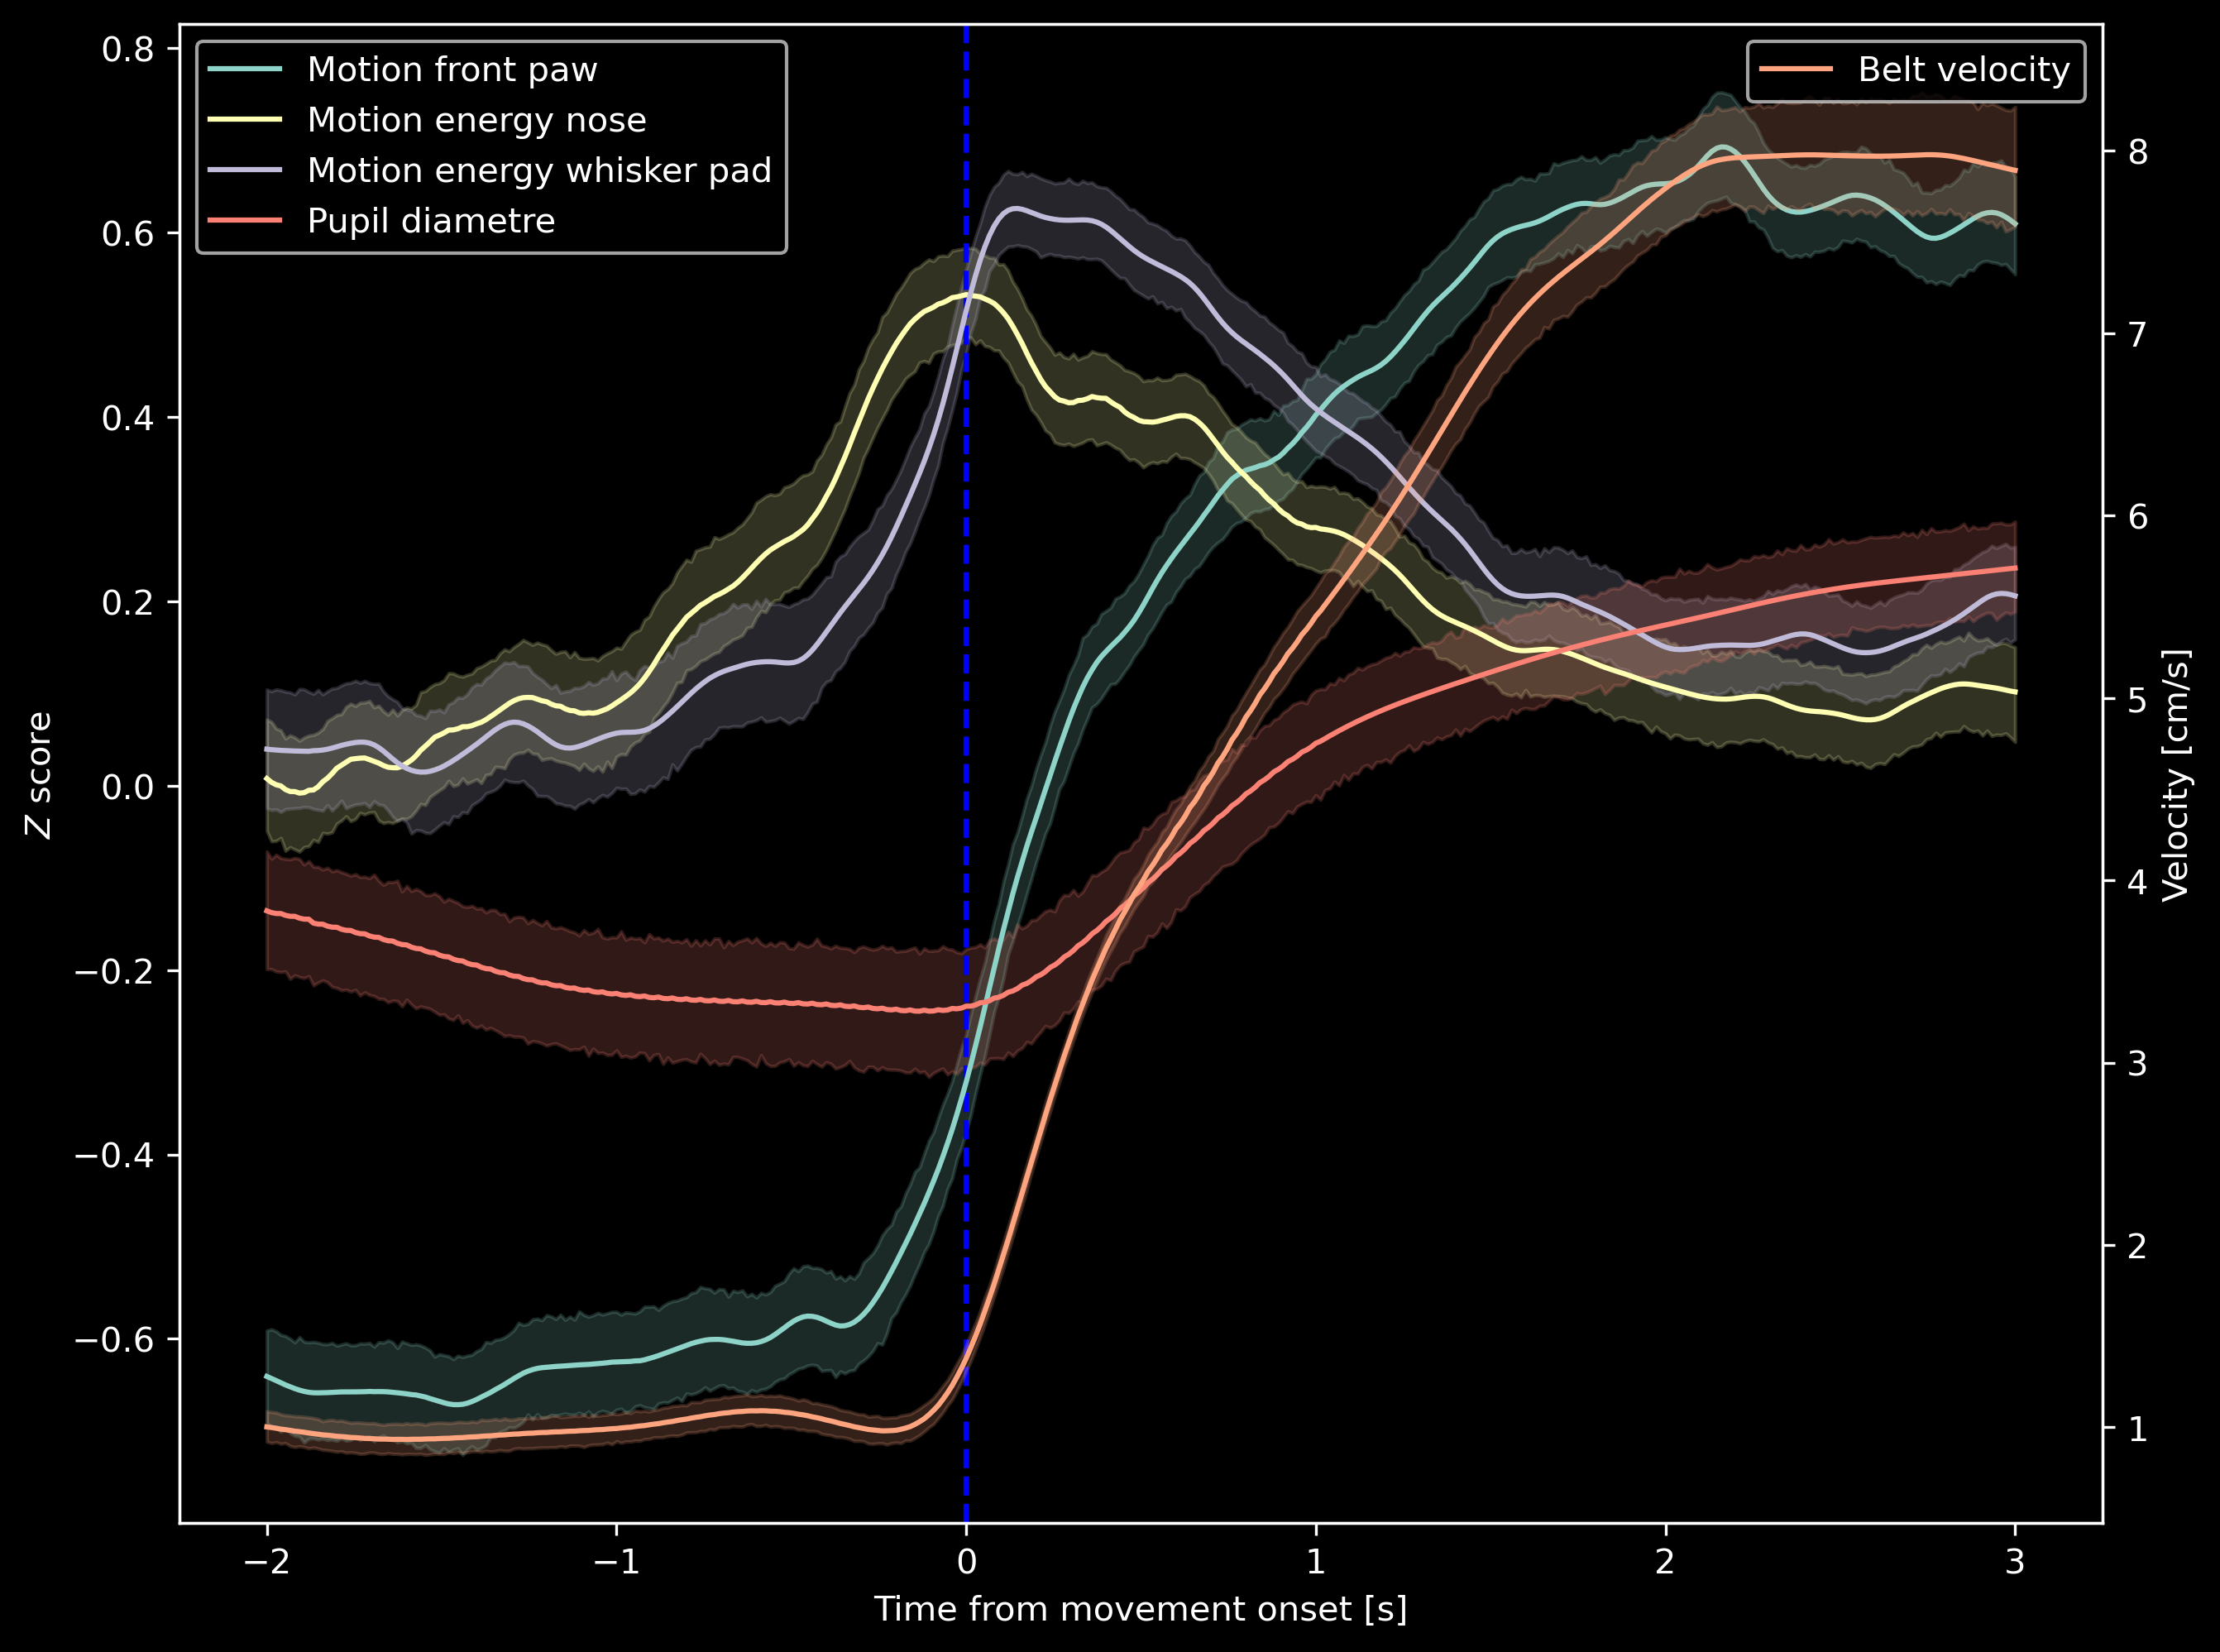

In [19]:
import seaborn as sns
#onsets['Velocity_shifted'] = onsets.Velocity.shift(-8)
trial = onsets.loc[onsets.FPS>50].onset_trial.unique()#.loc[(onsets.Brake_On==True)]
fig, ax = plt.subplots(figsize=(10,8))
ax.axvline(0, ls='--', c='b')
ax2 = ax.twinx()
sns.lineplot(data=onsets.loc[onsets.onset_trial.isin(trial)], x='Time', y='Motion_Frontpaw', label='Motion front paw', ax=ax)
#sns.lineplot(data=onsets.loc[onsets.onset_trial.isin(trial)], x='Time', y='Velocity_diff', label='Velocity_diff', ax=ax)
sns.lineplot(data=onsets.loc[onsets.onset_trial.isin(trial)], x='Time', y='MotionEnergy_Nose', label='Motion energy nose', ax=ax)
sns.lineplot(data=onsets.loc[onsets.onset_trial.isin(trial)], x='Time', y='MotionEnergy_Whiskerpad', label='Motion energy whisker pad', ax=ax)
sns.lineplot(data=onsets.loc[onsets.onset_trial.isin(trial)], x='Time', y='PupilDiameter', label='Pupil diametre', ax=ax)
ax.set_ylabel('$\it{Z}$ score')
ax.legend(loc='upper left')
sns.lineplot(data=onsets.loc[onsets.onset_trial.isin(trial)], x='Time', y='Velocity', color='#fea47f', label='Belt velocity', ax=ax2)
ax2.legend(loc='upper right')#, bbox_to_anchor=(0.6,0.5))
ax.set_xlabel('Time from movement onset [s]')
ax2.set_ylabel('Velocity [cm/s]')
# ax.set_title('N='+str(len(trial))+' onsets')
plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/movement_onsets.pdf', dpi=300)


ValueError: Could not interpret value `Motion_Frontpaw_raw` for parameter `y`

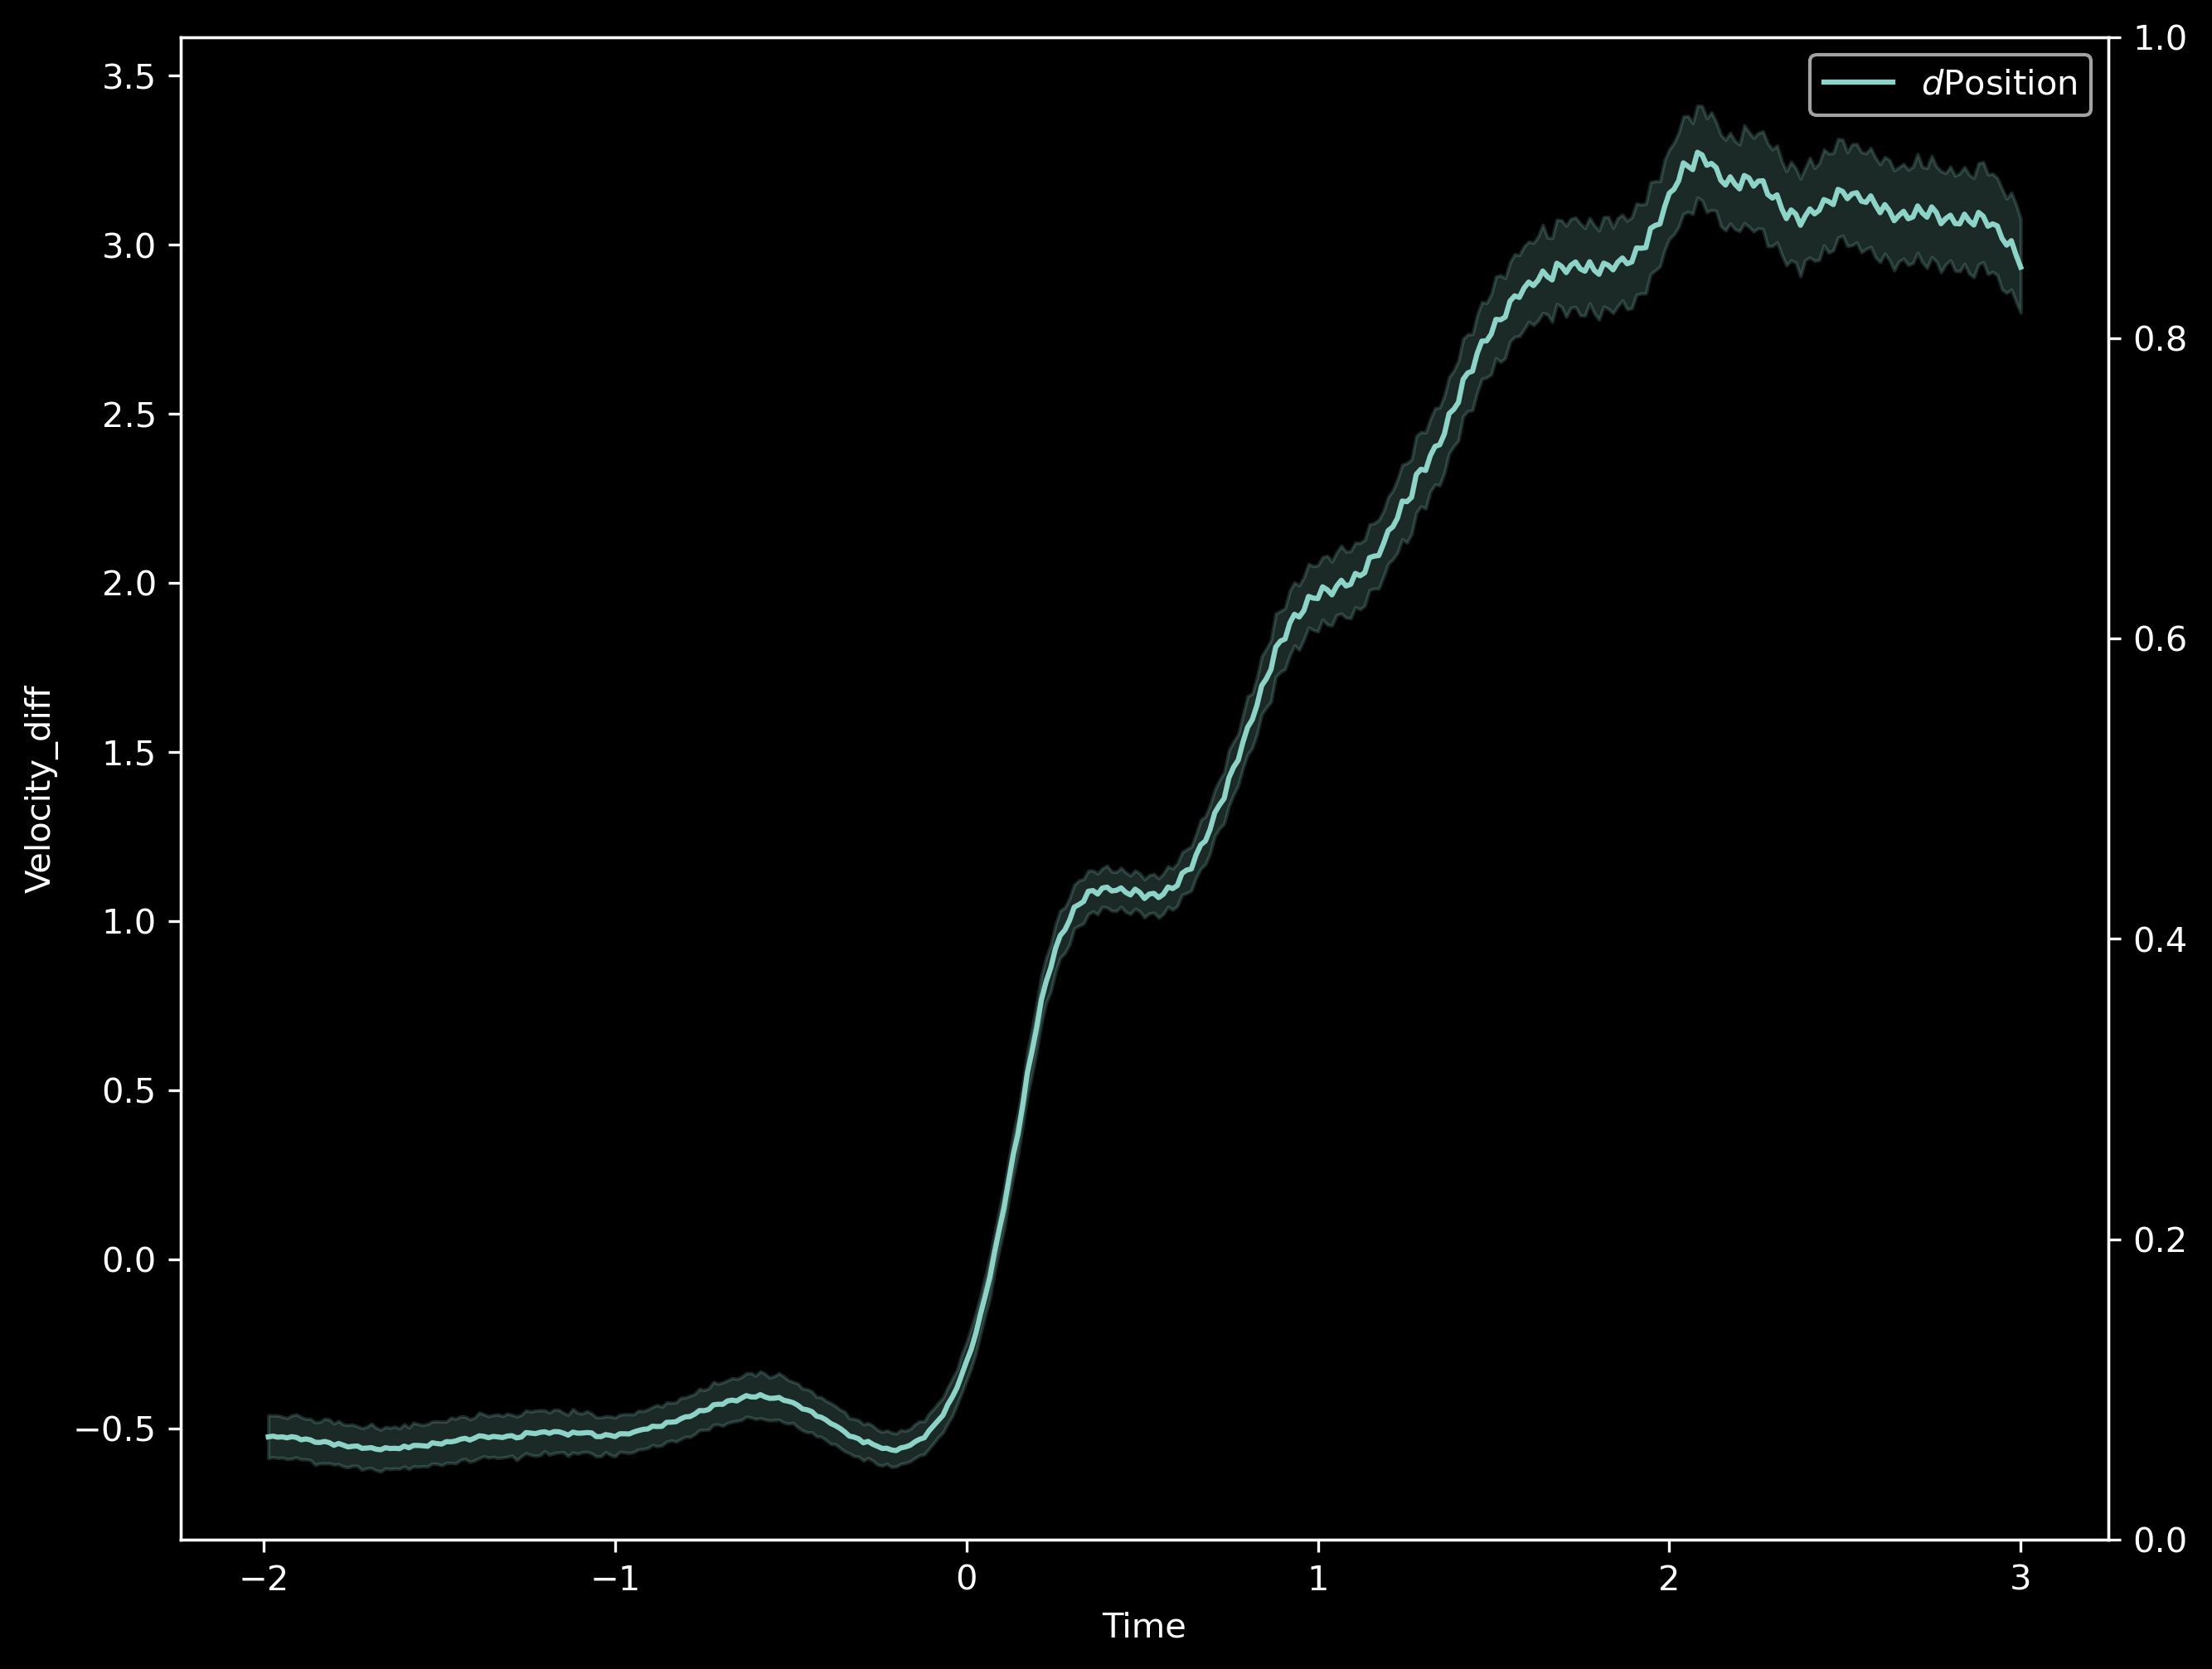

In [14]:
trial = onsets.onset_trial.unique()
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))
ax2 = ax.twinx()
#sns.lineplot(data=onsets.loc[onsets.onset_trial.isin(trial)], x='Time', y='Cylinder_Motion_raw', label='Cylinder motion raw', ax=ax)
sns.lineplot(data=onsets.loc[onsets.onset_trial.isin(trial)], x='Time', y='Velocity_diff', label='$d$Position', ax=ax)
sns.lineplot(data=onsets.loc[onsets.onset_trial.isin(trial)], x='Time', y='Motion_Frontpaw_raw', label='Motion front paw raw', ax=ax)
sns.lineplot(data=onsets.loc[onsets.onset_trial.isin(trial)], x='Time', y='MotionEnergy_Nose', label='Motion energy nose', ax=ax)
sns.lineplot(data=onsets.loc[onsets.onset_trial.isin(trial)], x='Time', y='PupilDiameter', label='Pupil diametre', ax=ax)
ax.set_ylabel('$\it{Z}$ score')
ax.legend(loc='upper left')
sns.lineplot(data=onsets.loc[onsets.onset_trial.isin(trial)], x='Time', y='Velocity', color='#fea47f', label='Belt velocity (Kalman)', ax=ax2)
ax2.legend(loc='upper right')#, bbox_to_anchor=(0.6,0.5))
ax.axvline(0, ls='--', c='w')
ax.set_xlabel('Time from movement onset [s]')
ax2.set_ylabel('Velocity [cm/s]')
ax2.set_xlim(-1,.5)
ax.set_ylim(-1,1.5)
ax2.set_ylim(.5,3)
plt.title('N='+str(len(trial))+' onsets')

In [ ]:
behaviour['PositionBin'] = pd.cut(behaviour.Position, np.arange(0, 364, 4), labels=False)
behaviour.Licking = behaviour.Licking / behaviour.Licking.std()
PositionBinned = behaviour.groupby(['ExpId', 'Lap', 'PositionBin']).mean().reset_index()
PositionBinned.PositionBin = PositionBinned.PositionBin*4

fig, ax = plt.subplots(figsize=(10,8))
ax2 = ax.twinx()
sns.lineplot(data=PositionBinned, x='PositionBin', y='MotionEnergy_Nose', label='Motion energy nose',  ax=ax)
sns.lineplot(data=PositionBinned, x='PositionBin', y='PupilDiam', label='Pupil diametre', ax=ax)
sns.lineplot(data=PositionBinned, x='PositionBin', y='MotionEnergy_Mouth', label='Mouth', ax=ax)
sns.lineplot(data=PositionBinned, x='PositionBin', y='Licking', label='Licking', ax=ax)
ax.set_ylabel('$\it{Z}$ score')
ax.legend(loc='upper left')
sns.lineplot(data=PositionBinned, x='PositionBin', y='Velocity', label='Velocity', color='#DDD7A3', ax=ax2)
ax2.legend(loc='upper right')#, bbox_to_anchor=(0.6,0.5))
ax.set_xlabel('Belt position [cm]')
ax2.set_ylabel('Velocity [cm/s]')
# plt.title('Mouse '+str(mouse)+', N='+str(int(len(PositionBinned)/4))+' laps')
plt.savefig('/Users/Oliver/Google Drive/AG Remy/LIN/Review/OB_figures/behaviour_belt.pdf', dpi=300)


In [ ]:
exp=161
columns = ['Height_Bum', 'PointMotion_FrontPaw', 'Velocity', 'EyeLidDist', 
           'PupilDiam',  'MotionEnergy_Whiskerpad','Licking', 
           'PointMotion_Mouth','MotionEnergy_Nose','MotionEnergy_Cheek',
       'MotionEnergy_Mouth'
       ]
df = behaviour.loc[(behaviour.ExpId==exp), columns]
sns.heatmap(df.corr(), cmap='seismic', annot=False, square=True, vmin=-1, vmax=1, cbar=True)
plt.savefig('/Users/Oliver/Google Drive/AG Remy/LIN/Review/OB_figures/behaviour_corr_{}.pdf'.format(exp), dpi=300)


In [ ]:
import plotly.express as px
px.imshow(behaviour.corr(), x=behaviour.corr().index, y=behaviour.corr().index, template='plotly_dark')

In [15]:
licking = behaviour.loc[behaviour.Licking>behaviour.Licking.std()/2][['Licking', 'Cam_FPS']]
lick_onsets75_coarse = licking.loc[(licking.Cam_FPS==75)&(licking.index.to_series().diff()>375)].index.to_list()
lick_onsets25_coarse = licking.loc[(licking.Cam_FPS==25)&(licking.index.to_series().diff()>125)].index.to_list()
lick_onsets75_precise = []
lick_onsets25_precise = []
for onset in lick_onsets75_coarse:
    lick = behaviour.Licking.loc[onset-75:onset]
    if pd.isnull(behaviour[['Licking', 'PointMotion_Mouth', 'PupilDiam']].loc[onset-75:onset+75]).sum().any()==0:
        lick_onsets75_precise += [lick[lick.diff()>lick.diff().std()/10].index.to_series().min()]
for onset in lick_onsets25_coarse:
    lick = behaviour.Licking.loc[onset-25:onset]
    if pd.isnull(behaviour[['Licking', 'PointMotion_Mouth', 'PupilDiam']].loc[onset-25:onset+25]).sum().any()==0:
        lick_onsets25_precise += [lick[lick.diff()>lick.diff().std()/10].index.to_series().min()]

In [16]:
# cut out onsets one second at beginning/end of trials
exp_breaks = behaviour.loc[(behaviour.ExpId.diff().astype(bool))].index.tolist() + [len(behaviour)]
break_range = np.array([np.arange(i-150, i+150) for i in exp_breaks]).flatten()
lick_onsets75_precise = [o for o in lick_onsets75_precise if o not in break_range]
lick_onsets25_precise = [o for o in lick_onsets25_precise if o not in break_range]

In [36]:
lick_onsets25 = pd.DataFrame([behaviour.Licking.loc[o-50:o+75].tolist() for o in lick_onsets25_precise]).T
lick_onsets25['Time'] = (lick_onsets25.index-50)/25
lick_onsets25 = lick_onsets25.melt(id_vars='Time', var_name='onset_trial', value_name='Licking')
lick_onsets25['MotionEnergy_Mouth'] = pd.DataFrame([behaviour.MotionEnergy_Mouth.loc[o-50:o+75].tolist() for o in lick_onsets25_precise]).values.flatten()
lick_onsets25['PointMotion_Mouth'] = pd.DataFrame([behaviour.PointMotion_Mouth.loc[o-50:o+75].tolist() for o in lick_onsets25_precise]).values.flatten()
lick_onsets25['PupilDiameter'] = pd.DataFrame([behaviour.PupilDiam.loc[o-50:o+75].tolist() for o in lick_onsets25_precise]).values.flatten()
lick_onsets25['Velocity'] = pd.DataFrame([behaviour.Velocity.loc[o-50:o+75].tolist() for o in lick_onsets25_precise]).values.flatten()
lick_onsets25['FPS'] = 25
lick_onsets25['post'] = lick_onsets25.Time>0

lick_onsets75 = pd.DataFrame([behaviour.Licking.loc[o-150:o+225].tolist() for o in lick_onsets75_precise]).T
lick_onsets75['Time'] = (lick_onsets75.index-150)/75
lick_onsets75 = lick_onsets75.melt(id_vars='Time', var_name='onset_trial', value_name='Licking')
lick_onsets75['MotionEnergy_Mouth'] = pd.DataFrame([behaviour.MotionEnergy_Mouth.loc[o-150:o+225].tolist() for o in lick_onsets75_precise]).values.flatten()
lick_onsets75['PointMotion_Mouth'] = pd.DataFrame([behaviour.PointMotion_Mouth.loc[o-150:o+225].tolist() for o in lick_onsets75_precise]).values.flatten()
lick_onsets75['PupilDiameter'] = pd.DataFrame([behaviour.PupilDiam.loc[o-150:o+225].tolist() for o in lick_onsets75_precise]).values.flatten()
lick_onsets75['Velocity'] = pd.DataFrame([behaviour.Velocity.loc[o-150:o+225].tolist() for o in lick_onsets75_precise]).values.flatten()
lick_onsets75['post'] = lick_onsets75.Time>0
lick_onsets75.onset_trial += lick_onsets25.onset_trial.max()
lick_onsets75['FPS'] = 75

lick_onsets = pd.concat([lick_onsets25, lick_onsets75])
lick_onsets = lick_onsets25
lick_onsets = lick_onsets.reset_index(drop=True)


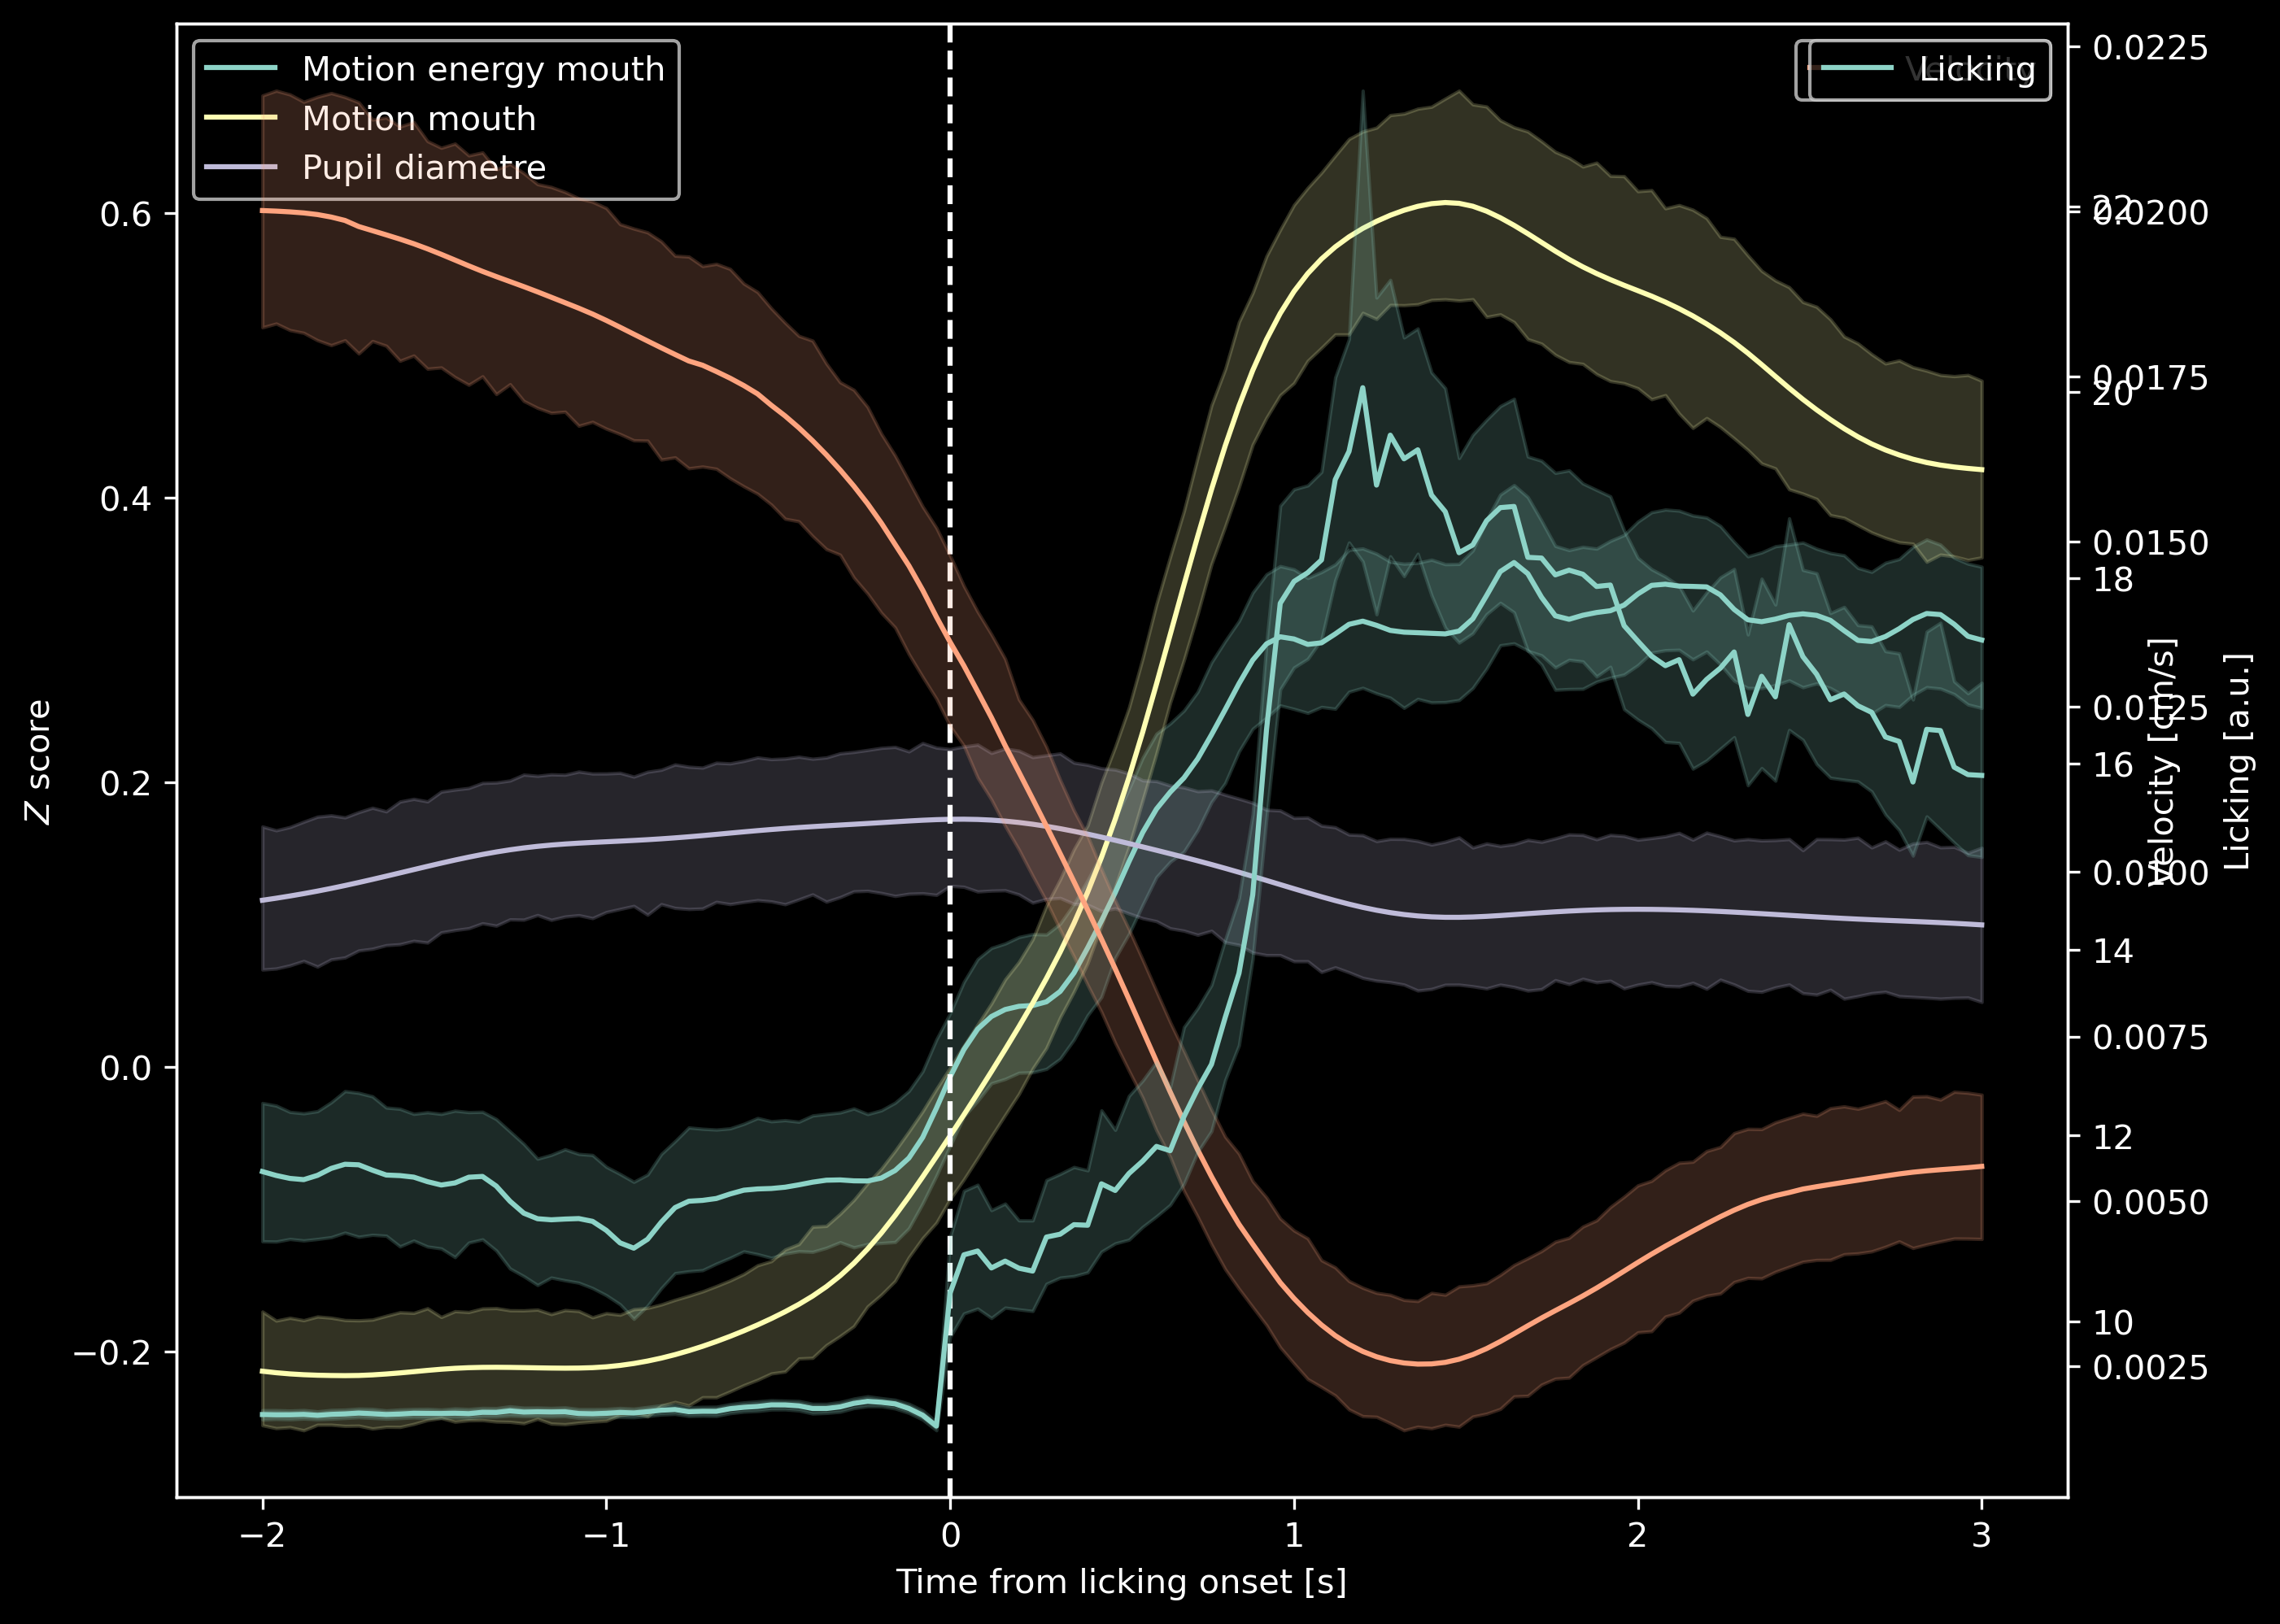

In [37]:
trial = lick_onsets.loc[lick_onsets.FPS==25].onset_trial.unique()#.loc[(onsets.Brake_On==True)]
fig, ax = plt.subplots(figsize=(10,8))
ax2 = ax.twinx()
ax3 = ax.twinx()
sns.lineplot(data=lick_onsets.loc[lick_onsets.onset_trial.isin(trial)], x='Time', y='Licking', label='Licking', ax=ax3)
sns.lineplot(data=lick_onsets.loc[lick_onsets.onset_trial.isin(trial)], x='Time', y='MotionEnergy_Mouth', label='Motion energy mouth', ax=ax)
sns.lineplot(data=lick_onsets.loc[lick_onsets.onset_trial.isin(trial)], x='Time', y='PointMotion_Mouth', label='Motion mouth', ax=ax)
sns.lineplot(data=lick_onsets.loc[lick_onsets.onset_trial.isin(trial)], x='Time', y='PupilDiameter', ax=ax, label='Pupil diametre') #estimator=None, units='onset_trial', alpha=.3
ax.set_ylabel('$\it{Z}$ score')
ax.legend(loc='upper left')
sns.lineplot(data=lick_onsets.loc[lick_onsets.onset_trial.isin(trial)], x='Time', y='Velocity', label='Velocity', color='#fea47f', ax=ax2)
ax2.legend(loc='upper right')#, bbox_to_anchor=(0.6,0.5))
ax3.legend(loc='upper right')#, bbox_to_anchor=(0.6,0.5))
ax.axvline(0, ls='--', c='w')
ax.set_xlabel('Time from licking onset [s]')
ax2.set_ylabel('Velocity [cm/s]')
ax3.set_ylabel('Licking [a.u.]')
#plt.title('Mouse '+str(mouse)+', N='+str(len(lick_onsets_precise))+' onsets')
plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/lick_onsets25.pdf', dpi=300)
